In [1]:
import os
import sys
import numpy as np
import d00_utils.input_text as di
import d00_utils.read_log as dr
import d00_utils.data_for_plot as ddfp
import d00_utils.plot as dp
import matplotlib.pyplot as plt
import matplotlib.colors as colors


lmp_folder_path = di.lmp_folder_path

# pickle variable
(log_variable_dic_list, n_simu_total, log_variable, folder_path_list_initial_to_last) = dr.dump_variable(lmp_folder_path)


In [3]:
n_ave=51
inputstepsarray=np.arange(10000000,45000000,1000000)
fixtimeave_id_fortime='avspatial_ave'
fixtimeave_id_forcoord='avspatial_ave'
fixtimeave_id_name=None
is_calculated_v=True
v_name_quiver_vector_1 = 'velocity_2'
v_name_quiver_vector_2 = 'velocity_3'

V_1 = ddfp.get_ave_value(n_ave, fixtimeave_id_fortime, v_name_quiver_vector_1, inputstepsarray, log_variable_dic_list, fixtimeave_id_name=fixtimeave_id_name, is_calculated_v=is_calculated_v)
V_2 = ddfp.get_ave_value(n_ave, fixtimeave_id_fortime, v_name_quiver_vector_2, inputstepsarray, log_variable_dic_list, fixtimeave_id_name=fixtimeave_id_name, is_calculated_v=is_calculated_v)
fixtimeave_id_name='avspatial_ave'
is_calculated_v=False
v_name_quiver_vector_1 = 'mv_2'
v_name_quiver_vector_2 = 'mv_3'

mv_1 = ddfp.get_ave_value(n_ave, fixtimeave_id_fortime, v_name_quiver_vector_1, inputstepsarray, log_variable_dic_list, fixtimeave_id_name=fixtimeave_id_name, is_calculated_v=is_calculated_v)
mv_2 = ddfp.get_ave_value(n_ave, fixtimeave_id_fortime, v_name_quiver_vector_2, inputstepsarray, log_variable_dic_list, fixtimeave_id_name=fixtimeave_id_name, is_calculated_v=is_calculated_v)
mass = ddfp.get_ave_value(n_ave, fixtimeave_id_fortime, 'mass', inputstepsarray, log_variable_dic_list, fixtimeave_id_name=fixtimeave_id_name, is_calculated_v=is_calculated_v)
mv = (mv_1**2 + mv_2**2)**0.5
V = (V_1**2 + V_2**2)**0.5
tV1 = mv_1/mass
tV2 = mv_2/mass
tV = mv/mass
np.nanmax(np.abs((tV-V)/V))


0.5706900297181353

In [3]:
n_ave=51
inputstepsarray=[15000000]
fixtimeave_id_fortime='avspatial_ave'
fixtimeave_id_forcoord='avspatial_ave'
fixtimeave_id_name=None
is_calculated_v=True
(coord_1, coord_2, V_1, V_2) = ddfp.quiver_data(
    log_variable_dic_list,
    n_ave,
    inputstepsarray,
    'velocity_1',
    'velocity_2',
    'Coord1',
    'Coord2',
    fixtimeave_id_fortime=fixtimeave_id_fortime,
    fixtimeave_id_forcoord=fixtimeave_id_forcoord,
    fixtimeave_id_name=fixtimeave_id_name,
    is_calculated_v=is_calculated_v,
    )
dp.api_contour_2D_2D_dim_xyqv_2222(
    coord_1, float(log_variable['dp']), 'fig_x_label',
    coord_2, float(log_variable['dp']), 'fig_y_label',
    V_1[0], 1,
    contour_norm = 'linear',
    contour_v_min_max = "constant", # or "min_to_max",
    vmin = 10**-5,
    vmax = 10**0,
    if_on_paper=False,
    )
dp.api_streamplot_2D_2D_dim_xyqv_2222(
    coord_1, float(log_variable['dp']), 'fig_x_label',
    coord_2, float(log_variable['dp']), 'fig_y_label',
    V_1[0], 1,
    V_2[0], 1,
    if_on_paper=False,
    )

AttributeError: module 'd00_utils.plot' has no attribute 'api_contour_2D_2D_dim_xyqv_2222'

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


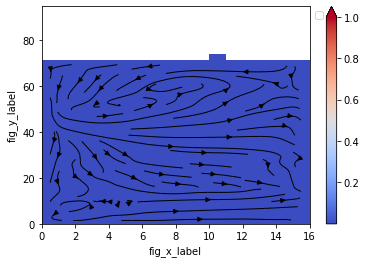

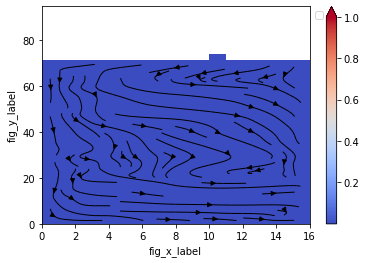

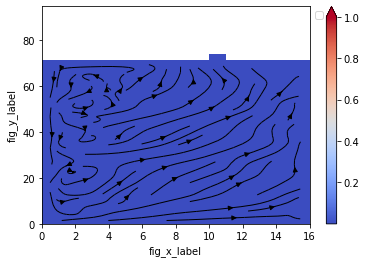

In [4]:

n_ave=51
inputstepsarray=np.arange(10000000,45000000,1000000)
v_name_x='Coord1'
x_scale_factor=float(log_variable['dp'])
fig_x_label='fig_x_label'
v_name_y='Coord2'
y_scale_factor=float(log_variable['dp'])
fig_y_label='fig_y_label'
v_name_q='velocity_2'
q_scale_factor=1
v_name_v='velocity_3'
v_scale_factor=1
quiver_scale=1
label_scale=1
label=""
if_on_paper=False
if_include_0_y_axis=True
fixtimeave_id_fortime='avspatial_ave'
fixtimeave_id_forcoord='avspatial_ave'
fixtimeave_id_name=None
is_calculated_v=True
contour_norm = 'linear'
contour_v_min_max = "constant" # or "min_to_max"
vmin = 10**-5
vmax = 10**0
(coord_1, coord_2, V_1, V_2) = ddfp.quiver_data(
    log_variable_dic_list,
    n_ave,
    inputstepsarray,
    v_name_q,
    v_name_v,
    v_name_x,
    v_name_y,
    fixtimeave_id_fortime=fixtimeave_id_fortime,
    fixtimeave_id_forcoord=fixtimeave_id_forcoord,
    fixtimeave_id_name=fixtimeave_id_name,
    is_calculated_v=is_calculated_v,
    )
for n in range(3):
    (x_value, y_value, q_value, v_value) = (coord_1, coord_2, V_1[n], V_2[n])
    # plot ave_z velocity across y
    fig, ax = plt.subplots()

    # xy label
    ax.set_xlabel(fig_x_label)
    ax.set_ylabel(fig_y_label)
    (fig, ax) = dp.api_ax_streamplot_xyqv_2222(
        fig, ax,
        x_value, x_scale_factor,
        y_value, y_scale_factor,
        q_value, q_scale_factor,
        v_value, v_scale_factor,
    )
    vector_value = np.sqrt(q_value**2 + v_value**2)
    vector_value = np.ma.masked_where(np.logical_not(vector_value > 0), vector_value)
    (fig, ax) = dp.api_ax_contour_xyv_222(
        fig, ax,
        x_value, x_scale_factor,
        y_value, y_scale_factor,
        vector_value, q_scale_factor,
        contour_norm = contour_norm,
        contour_v_min_max = contour_v_min_max, # or "min_to_max",
        vmin = vmin,
        vmax = vmax,
    )
    if not if_on_paper:
        (fig, ax) = dp.action_for_not_on_paper(fig, ax)

In [6]:


quiver_scale=1
label_scale=1
dp.save_plot_velocity_streamplot_contour(
    log_variable_dic_list,
    51,
    np.array([6000000, 15000000]),
    'Coord1', float(log_variable['dp']), 'y',
    'Coord2', float(log_variable['dp']), 'z',
    'velocity_2', abs(float(log_variable['in_velocity'])),
    'velocity_3', abs(float(log_variable['in_velocity'])),
    quiver_scale,
    label_scale,
    if_on_paper=False,
    if_include_0_y_axis=True,
    fixtimeave_id_fortime='avspatial_ave',
    fixtimeave_id_forcoord='avspatial_ave',
    fixtimeave_id_name=None,
    is_calculated_v=True,
    contour_norm = 'log',
    contour_v_min_max = "min_to_max", # or "min_to_max",
    vmin = 10**-5,
    vmax = 10**0,
)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


No handles with labels found to put in legend.


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b89864ef0>)

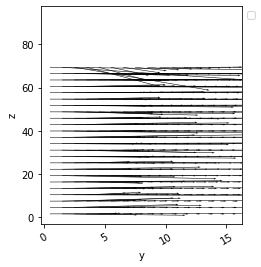

In [3]:
dp.plot_quiver(
    log_variable_dic_list,
    51,
    [15000000],
    'Coord1', float(log_variable['dp']), 'y',
    'Coord2', float(log_variable['dp']), 'z',
    'velocity_1', abs(float(log_variable['in_velocity'])), 'fig_q_label',
    'velocity_2', abs(float(log_variable['in_velocity'])), 'fig_v_label',
    abs(float(log_variable['in_velocity'])),
    abs(float(log_variable['in_velocity'])),
    if_on_paper=False,
    if_include_0_y_axis=True,
    fixtimeave_id_fortime='avspatial_ave',
    fixtimeave_id_forcoord='avspatial_ave',
    fixtimeave_id_name=None,
    is_calculated_v=True,
    )